# CBIR CON HISTOGRAMA DE TEXTURAS

In [58]:
from collections import Counter
import cv2
import numpy as np
import os
from sklearn.neighbors import NearestNeighbors
from skimage.feature import graycomatrix, graycoprops  # Cambio de import

# Función para calcular las características de textura de Haralick
def calcular_histograma_textura(imagen):
    gray_imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Calcular la matriz de co-ocurrencia de niveles de gris (GLCM) utilizando graycomatrix
    glcm = graycomatrix(gray_imagen, [1], [0], symmetric=True, normed=True)
    
    # Calcular las características de textura de Haralick utilizando graycoprops
    textura = graycoprops(glcm, prop='contrast')[0]
    
    return textura

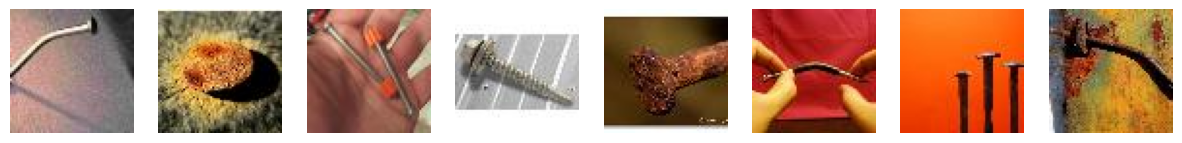

In [59]:
directorio_imagenes = './dataset/autobus-n04487081'

# Cargar todas las imágenes en una lista
imagenes = []
for filename in os.listdir(directorio_imagenes):
    imagen = cv2.imread(os.path.join(directorio_imagenes, filename))
    imagenes.append(imagen)

# Calcular y almacenar los histogramas de texturas de todas las imágenes
histogramas_textura = [calcular_histograma_textura(imagen) for imagen in imagenes]

# Crear una matriz numpy para los histogramas de textura
histogramas_textura_matriz = np.array(histogramas_textura)

# Entrenar el modelo k-NN
knn = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='euclidean')
knn.fit(histogramas_textura_matriz)

# Calcular el histograma de textura de la imagen de consulta
imagen_de_consulta = cv2.imread('./dataset/autobus-n04487081/n04487081_3.JPEG')
histograma_textura_consulta = calcular_histograma_textura(imagen_de_consulta).reshape(1, -1)

# Encontrar las imágenes más similares usando k-NN
distancias, indices = knn.kneighbors(histograma_textura_consulta)

# Obtener las imágenes más similares
n_similares = 8  # Puedes ajustar el número de imágenes que deseas mostrar
ids_similares = indices[0][:n_similares]

# Mostrar las imágenes más similares utilizando las funciones definidas
sorted_indexes = get_n_similar(n_similares)
display_n_similar(sorted_indexes, n_similares)
